In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
def avg_search_time(df):
    search_time = df.loc[0, ['search_time', 'num_objects']].values
    search_time = search_time[0] / search_time[1]
    return search_time

def create_time(df):
    return df.loc[0, ['creation_time']].values[0] / 1000000

In [4]:
search_time = []

exp_map = {
    "const_buffer": "cost_buffer",
    "base": "base"
}

dfs = []
for k, v in exp_map.items():
    df_sum = pd.read_csv(f"../results_remote_new/FAST_KNN_NO_ObjIndex_{k}.csv").reset_index()
    search_time.append({'name': v, 'search_time': avg_search_time(df_sum), 'creation_time': create_time(df_sum)})
    df = pd.read_csv(f"../results_05_10/FAST_KNN_NO_ObjIndex_{k}_descend_timeline_1000000_100000.csv", names=['count']).reset_index()
    df['name'] = v
    dfs.append(df)

create_des = pd.concat(dfs)
create_des

FileNotFoundError: [Errno 2] No such file or directory: '../results_remote_new/FAST_KNN_NO_ObjIndex_const_buffer.csv'

## Descends over time

(0.0, 10000.0)

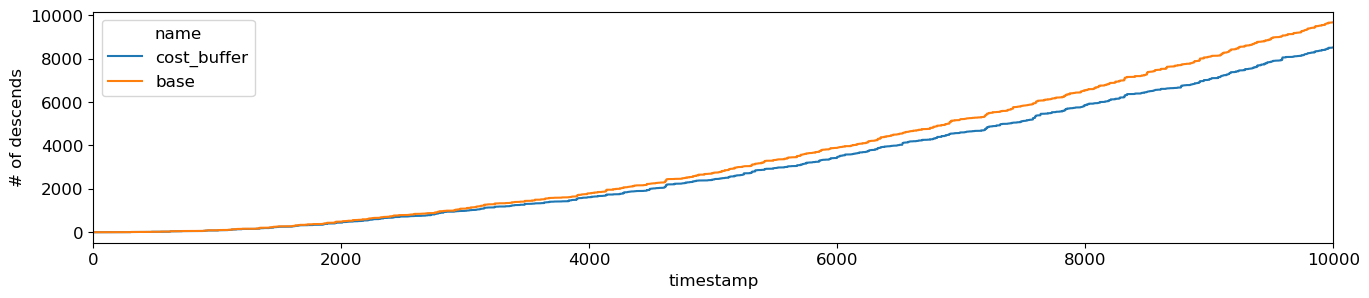

In [4]:
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='count', hue='name', data=create_des[create_des['index'] < 10000])
plt.xlabel('timestamp')
plt.ylabel('# of descends')
plt.xlim(0, 10000)

(array([0, 1]), [Text(0, 0, 'cost_buffer'), Text(1, 0, 'base')])

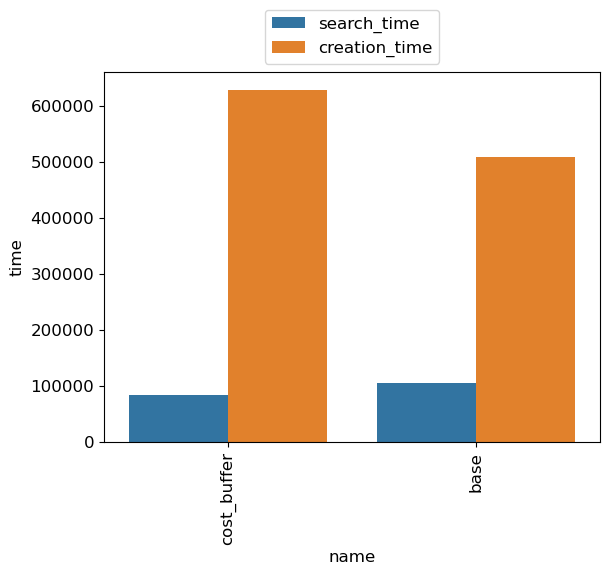

In [6]:
summary = pd.DataFrame(search_time)
summary = summary.melt(id_vars=['name'], var_name='stage', value_name='time')

ax = sns.barplot(x='name', y='time', hue='stage', data=summary)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))
plt.xticks(rotation=90)